# Gemaakt op 24/04/2025 door martijn

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
my_data = pd.read_csv("./games.csv")
my_data

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,Very Positive,96,101,22.00,0.00,0.0,True
50868,1272080,PAYDAY 3,2023-09-21,True,False,False,Mostly Negative,38,29458,40.00,0.00,0.0,True
50869,1402110,Eternights,2023-09-11,True,False,False,Very Positive,89,1128,30.00,0.00,0.0,True
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,17.00,0.00,0.0,True


# univariate analysis

## categorical

- win
- rating

## numerical

- price_final
- user_reviews

## column win

I assume that 90% of games are playable on Windows

<Axes: ylabel='count'>

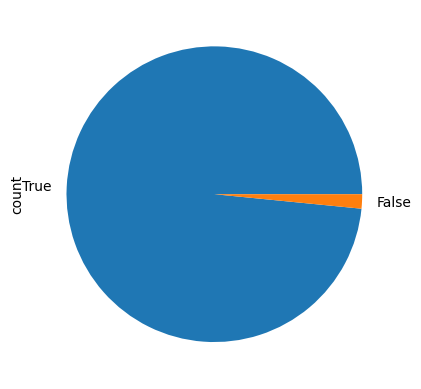

In [5]:
my_data["win"].value_counts(dropna=True).plot(kind="pie")

Playable on windows: 98.4352885673848%


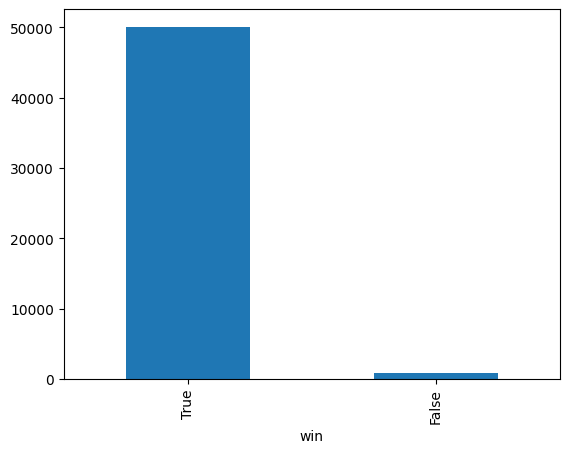

In [6]:
my_data["win"].value_counts(dropna=True).plot(kind="bar")
allItems = my_data["win"].value_counts(dropna=True)[True] + my_data["win"].value_counts(dropna=True)[False]

print(f"Playable on windows: {(my_data["win"].value_counts(dropna=True)[True] / allItems * 100)}%")

In [7]:
my_data[my_data["win"] == False]

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
30,458790,The House in Fata Morgana Original Soundtrack,2016-05-13,False,False,False,Positive,100,32,11.99,11.99,0.0,True
109,610070,Rain World - Soundtrack,2017-03-27,False,False,False,Positive,80,30,9.99,9.99,0.0,True
180,453400,Squad - Original Soundtrack Vol. 1 & 2,2016-04-29,False,False,False,Very Positive,93,97,6.99,6.99,0.0,True
204,613230,Planescape: Torment: Enhanced Edition Official...,2017-04-11,False,False,False,Mostly Positive,70,17,9.99,9.99,0.0,True
214,2277010,Postmouse Soundtrack,2023-01-30,False,False,False,Positive,100,27,0.00,0.00,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50626,947910,GLAD VALAKAS SIMULATOR - Soundtrack,2018-09-21,False,False,False,Positive,92,13,0.00,0.00,0.0,True
50628,1782140,Yupitergrad 🚀: Sneaki Soundtrack,2021-10-29,False,False,False,Positive,100,12,0.00,0.00,0.0,True
50655,1126650,The Forgotten: Soundtrack,2021-03-13,False,False,False,Positive,90,10,0.00,0.00,0.0,True
50677,945690,CardLife: Soundtrack,2018-10-09,False,False,False,Mostly Positive,70,10,0.00,0.00,0.0,True


### Result1

I assumed it was 90% but it was 98% which is close but not correct.

And this is apparently mostly just soundtracks that don't support windows


### column rating

#### guess 1

I am assuming that most games have a positive rating. I am going to guess that 69% of the games has a positive rating (any varient) and 31% negative (any varient)

#### Guess 2

I am assuming that out of all categories we have Mostly "Positive" for about 30%, 20% "mostly negative", followed by "mostly positive", "Very Positive", "Very Negative", "Orewhelmingly positive", "negative", "mixed", "overwhelmingly negative"




<Axes: xlabel='rating_category'>

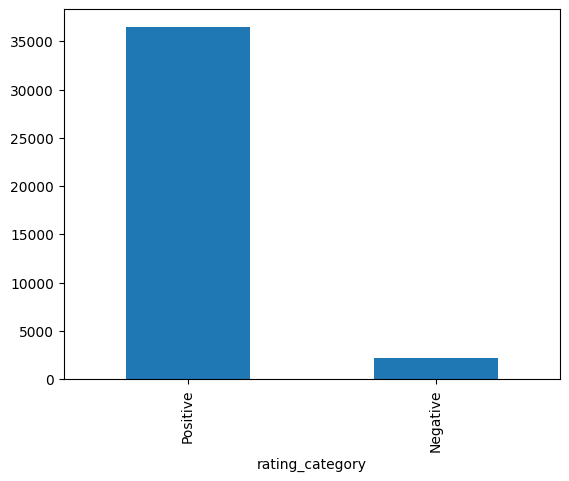

In [8]:

filtered_data = my_data[my_data["rating"] != "Mixed"].copy()

positive_ratings = [
    "Positive", "Very Positive", "Mostly Positive", "Overwhelmingly Positive"
]
negative_ratings = [
    "Negative", "Very Negative", "Mostly Negative", "Overwhelmingly Negative"
]

filtered_data["rating_category"] = filtered_data["rating"].apply(
    lambda x: "Positive" if x in positive_ratings else "Negative"
)
filtered_data["rating_category"].value_counts(dropna=True).plot(kind="bar")

In [9]:
allItems = filtered_data["rating_category"].value_counts(dropna=True)["Negative"] + filtered_data["rating_category"].value_counts(dropna=True)["Positive"]

print(f"Positive Reviews: {(filtered_data["rating_category"].value_counts(dropna=True)["Positive"] / allItems * 100)}%")
print(f"Negative Reviews: {(filtered_data["rating_category"].value_counts(dropna=True)["Negative"] / allItems * 100)}%")

Positive Reviews: 94.25029058504457%
Negative Reviews: 5.7497094149554435%


#### Guess 1 result: 

i was wrong, by a lot. I guessed 69%, but it is 94% (ognorign the mixed category)

<Axes: xlabel='rating'>

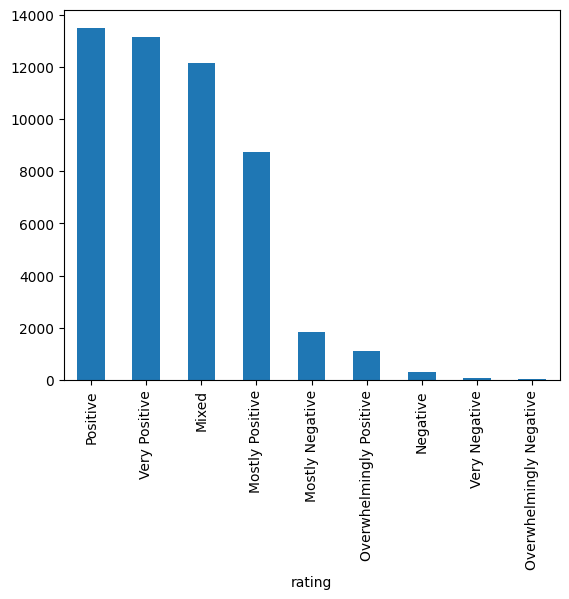

In [10]:
my_data["rating"].value_counts(dropna=True).plot(kind="bar")


In [11]:
allItems = my_data["win"].value_counts(dropna=True)[True] + my_data["win"].value_counts(dropna=True)[False]

print(f"Positive: {(my_data["rating"].value_counts(dropna=True)["Positive"] / allItems * 100)}%")
print(f"Very Positive: {(my_data["rating"].value_counts(dropna=True)["Very Positive"] / allItems * 100)}%")
print(f"Overwhelmingly Positive: {(my_data["rating"].value_counts(dropna=True)["Overwhelmingly Positive"] / allItems * 100)}%")
print(f"Mostly Positive: {(my_data["rating"].value_counts(dropna=True)["Mostly Positive"] / allItems * 100)}%")
print(f"Mixed: {(my_data["rating"].value_counts(dropna=True)["Mixed"] / allItems * 100)}%")
print(f"Negative: {(my_data["rating"].value_counts(dropna=True)["Negative"] / allItems * 100)}%")
print(f"Very Negative: {(my_data["rating"].value_counts(dropna=True)["Very Negative"] / allItems * 100)}%")
print(f"Overwhelmingly Negative: {(my_data["rating"].value_counts(dropna=True)["Overwhelmingly Negative"] / allItems * 100)}%")
print(f"Mostly Negative: {(my_data["rating"].value_counts(dropna=True)["Mostly Negative"] / allItems * 100)}%")

Positive: 26.541122818053154%
Very Positive: 25.8275672275515%
Overwhelmingly Positive: 2.18194684698852%
Mostly Positive: 17.176442836924043%
Mixed: 23.897232269224723%
Negative: 0.595612517691461%
Very Negative: 0.11794307281019027%
Overwhelmingly Negative: 0.027520050322377733%
Mostly Negative: 3.634612360434031%


#### Guess 2 result:

yeah i was wrong, positive was 26% instead of 30% which is close, but then it goes downhill from there

## Numerical

### price_final

I am guessing that the average game will be 25 bucks. The mean will probably be 27 or 23 bucks. and i am assuming a few outliers in the dataset. the min will be 0. but i am assuming that the max will be somewhere in the 1K

<Axes: >

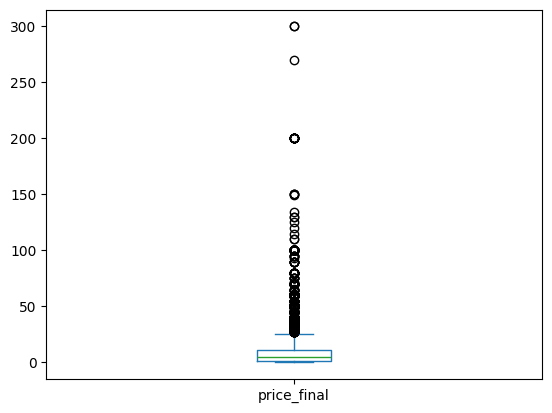

In [12]:
my_data["price_final"].plot(kind="box")


there are a lot more outliers than i thought

i'll be removing all outliers above 30


<Axes: >

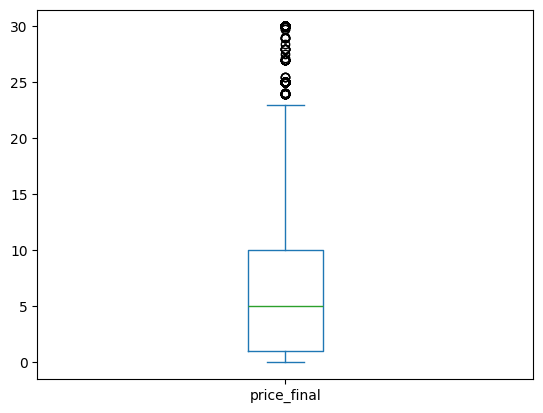

In [25]:
my_data[my_data["price_final"] < 30]["price_final"].plot(kind="box")

still more outliers so i'll remove everything above 24

<Axes: >

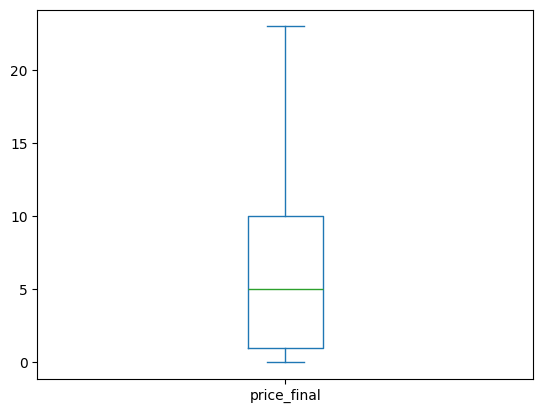

In [22]:
my_data[my_data["price_final"] < 23]["price_final"].plot(kind="box")

we can see the average is 5 dollar, and the gueass i had is not even in the boxplot xD.
i am wrong once again.

In [55]:
my_data[(my_data["price_final"] < 23) & (my_data["price_final"] > 0)]["price_final"].mean()


np.float64(7.784222888555722)

ja de mean is 7.7 dollar

## Numerical

### user_reviews

I actually have no clue. Maybe an average of 112 reviews per game?

<Axes: >

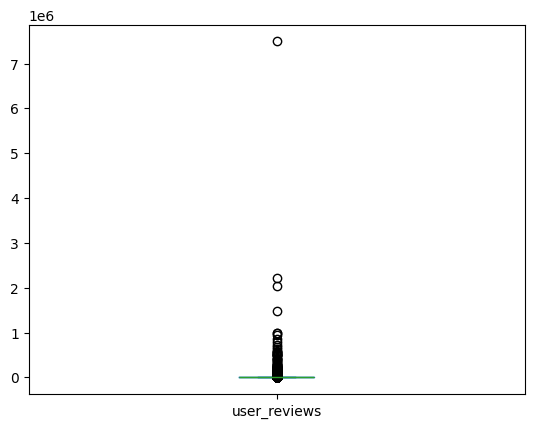

In [37]:
my_data["user_reviews"].plot(kind="box")

there is something weird going on, let's look at the outliers

In [40]:
q1 = my_data["user_reviews"].quantile(0.25)
q3 = my_data["user_reviews"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(upper_bound)

outliers = my_data[(my_data["user_reviews"] < lower_bound) | (my_data["user_reviews"] > upper_bound)]

outliers



486.5


,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
5,250180,METAL SLUG 3,2015-09-14,True,False,False,Very Positive,90,5579,7.99,7.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50853,1931730,Fort Solis,2023-08-22,True,False,False,Mostly Positive,71,667,20.00,0.00,0.0,True
50860,2441270,Kill The Crows,2023-08-20,True,False,False,Overwhelmingly Positive,96,517,5.00,0.00,0.0,True
50865,2195250,EA SPORTS FC™ 24,2023-09-28,True,False,False,Mixed,55,4473,70.00,0.00,0.0,True
50868,1272080,PAYDAY 3,2023-09-21,True,False,False,Mostly Negative,38,29458,40.00,0.00,0.0,True


So now we know the upper bound is 486.5, lets filter everything out above it

<Axes: >

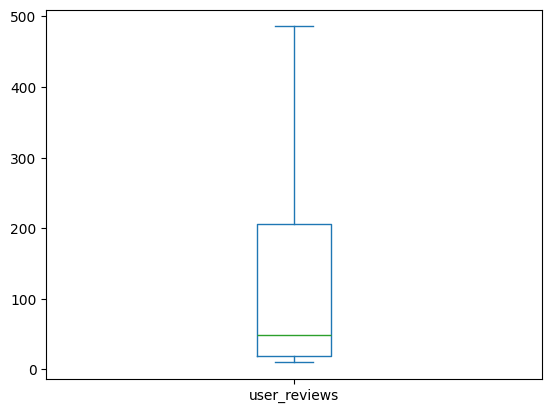

In [47]:
my_data["user_reviews"].plot(kind="box", showfliers=False)


nou nou zeg, zit ik alweer fout. t gemiddelde is ongeveer 60, ik zat te gokken op 112

In [53]:
my_data[(my_data["user_reviews"] < 500) & (my_data["user_reviews"] > 0)]["user_reviews"].mean()


np.float64(79.13214976351902)

de mean is 80 omdat ik de outliers er uit heb ghaald